<a href="https://colab.research.google.com/github/Pree-om/deep-learning/blob/main/ImageClassificationUsingYOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 11.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
from ultralytics import YOLO
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
model = YOLO("yolov8m-seg.pt")

100%|██████████| 52.4M/52.4M [00:00<00:00, 201MB/s]


In [7]:
from PIL import Image
import requests

image_path="https://thumbs.dreamstime.com/b/beautiful-fashionable-woman-crossing-road-beautiful-fashionable-woman-crossing-road-151336836.jpg"
img = Image.open(requests.get(image_path,stream=True).raw)
img = np.array(img)
img1=img.copy()

yolo_classes=list(model.names.values())
class_ids=[yolo_classes.index(clas) for clas in yolo_classes]

In [10]:
conf=0.5
results = model(img,conf=conf)
colors = [random.choices(range(256), k=3) for _ in class_ids]
print(results)
color_number = 0
for result in results:
    for mask,box in zip(result.masks.xy,result.boxes):
        points=np.int32([mask])
        cv2.fillPoly(img, [points],  colors[color_number % len(colors)])

        label = f"{yolo_classes[int(box.cls[0])]}:{box.conf[0]:.2f}"
        org = (int(box.xyxy[0][0]), int(box.xyxy[0][1]) - 10)
        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 0.75
        color = (255,120,120)
        thickness = 2
        cv2.putText(img, label, org, font, fontScale, color, thickness)
        color_number += 1


0: 448x640 3 persons, 8 cars, 1973.6ms
Speed: 60.9ms preprocess, 1973.6ms inference, 84.7ms postprocess per image at shape (1, 3, 448, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'ban

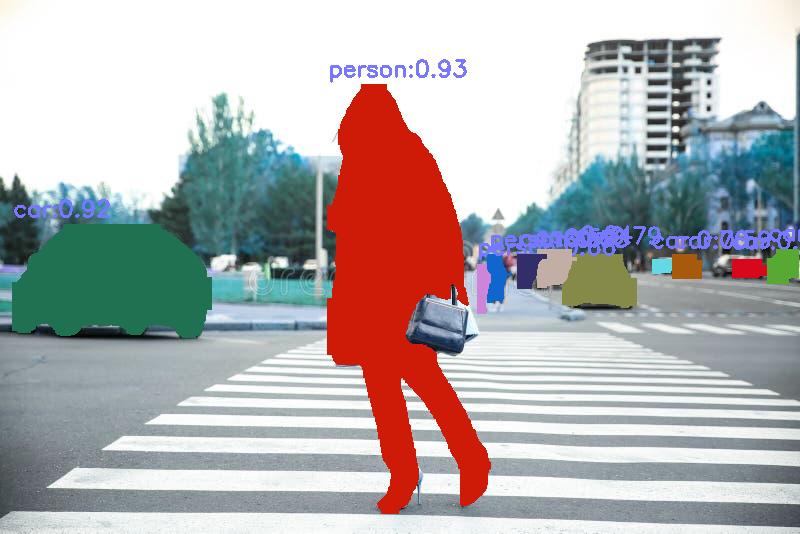

In [14]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)